In [3]:
!pip install pyttsx3

  Using cached pyttsx3-2.90-py3-none-any.whl.metadata (3.6 kB)
  Using cached comtypes-1.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pypiwin32-223-py3-none-any.whl.metadata (236 bytes)
Using cached pyttsx3-2.90-py3-none-any.whl (39 kB)
Using cached comtypes-1.3.1-py3-none-any.whl (197 kB)
Using cached pypiwin32-223-py3-none-any.whl (1.7 kB)


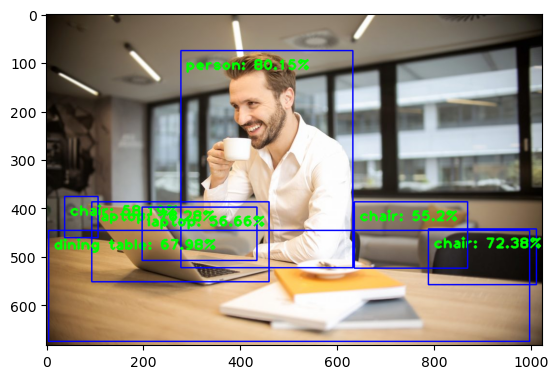

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import pyttsx3

# Function to provide voice feedback
def speak(text):
    engine.say(text)
    engine.runAndWait()

# Initialize pyttsx3 engine for voice feedback
engine = pyttsx3.init()

# Load the class names
classNames = []
with open('coco.names','r') as f:
    classNames = f.read().splitlines()

# Load the pre-trained model
weightsPath = "frozen_inference_graph.pb"
configPath = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
net = cv2.dnn_DetectionModel(weightsPath, configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

# Function for object detection in image
def detect_in_image(img):
    ClassIndex, confidence, bbox = net.detect(img, confThreshold=0.5)
    font_scale = 2
    font = cv2.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
        cv2.rectangle(img, boxes, (255, 0, 0), 2)
        object_name = classNames[ClassInd - 1]
        confidence_percent = round(conf * 100, 2)
        text = f"{object_name}: {confidence_percent}%"
        cv2.putText(img, text, (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
        speak(object_name)  # Provide voice feedback for detected object
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

# Function for object detection in video
def detect_in_video():
    cap = cv2.VideoCapture("Road_traffic_video2.mp4")
    if not cap.isOpened():
        cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot Open Video")
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    while True:
        ret, frame = cap.read()
        ClassIndex, confidence, bbox = net.detect(frame, confThreshold=0.55)
        if len(ClassIndex) != 0:
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 91:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    object_name = classNames[ClassInd - 1]
                    confidence_percent = round(conf * 100, 2)
                    text = f"{object_name}: {confidence_percent}%"
                    cv2.putText(frame, text, (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
                    speak(object_name)  # Provide voice feedback for detected object
        cv2.imshow('Object Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# Image detection
img = cv2.imread('best2.jpg')
detect_in_image(img)

# Video detection
# detect_in_video()
